In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv("CC GENERAL.csv")
data.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [32]:
data.drop(columns="CUST_ID",inplace=True)
print(data.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [33]:
data.fillna(method='ffill',inplace=True)
data.isna().sum()

<ipython-input-33-eda46a4f0449>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [34]:
data.shape

(8950, 17)

In [35]:
data.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [36]:
from sklearn.preprocessing import normalize
x=normalize(data)
x_normalize=pd.DataFrame(x)

In [37]:
x_normalize.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.039353,0.000787,0.09179,0.0,0.09179,0.00000,0.00016,0.0,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.00000,0.0,0.00000,0.59124,0.00000,0.0,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101


In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_normalize)
x_pca=pd.DataFrame(x_pca,columns=["p1","p2"])

In [39]:
x_pca.head()

,p1,p2
0,0.315576,-0.044823
1,-0.317328,-0.156866
2,0.206978,-0.183004
3,0.279409,-0.118059
4,-0.140988,-0.090323


# Data Visualization!

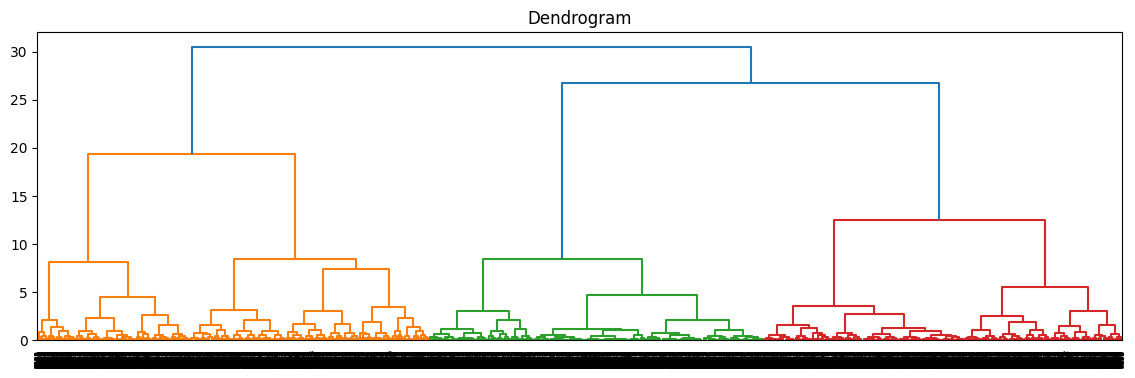

In [43]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,4))
plt.title("Dendrogram")
dendrogram=sch.dendrogram(sch.linkage(x_pca,method="ward"))

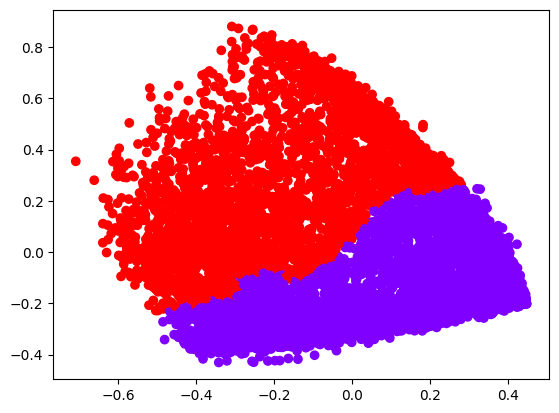

In [45]:
from sklearn.cluster import AgglomerativeClustering
a1=AgglomerativeClustering(n_clusters=2)
plt.scatter(x_pca["p1"],x_pca["p2"],c=a1.fit_predict(x_pca),cmap="rainbow")

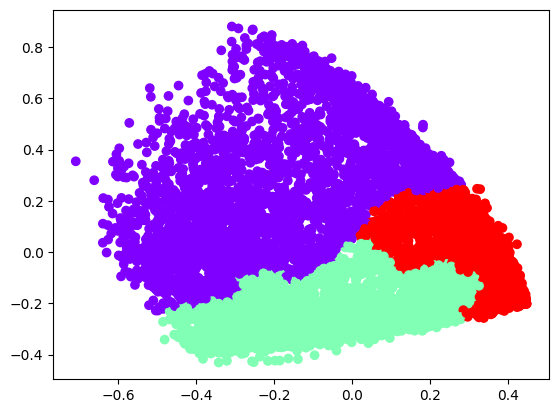

In [46]:
a2=AgglomerativeClustering(n_clusters=3)
plt.scatter(x_pca['p1'],x_pca['p2'],c=a2.fit_predict(x_pca),cmap="rainbow")

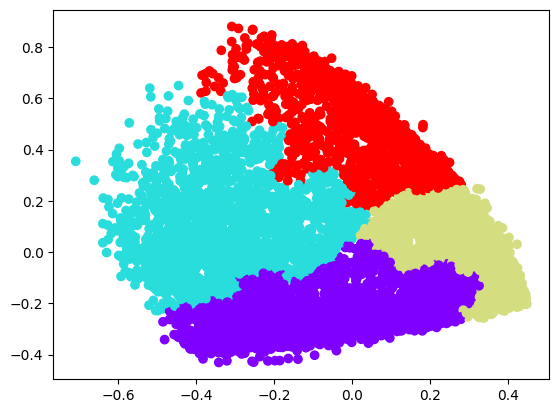

In [47]:
a3=AgglomerativeClustering(n_clusters=4)
plt.scatter(x_pca['p1'],x_pca['p2'],c=a3.fit_predict(x_pca),cmap="rainbow")

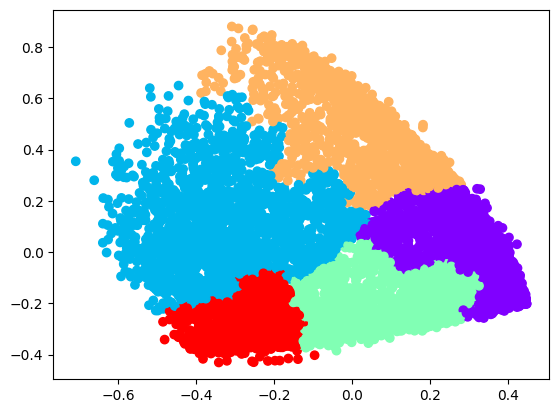

In [51]:
a4=AgglomerativeClustering(n_clusters=5)
plt.scatter(x_pca['p1'],x_pca['p2'],c=a4.fit_predict(x_pca),cmap="rainbow")

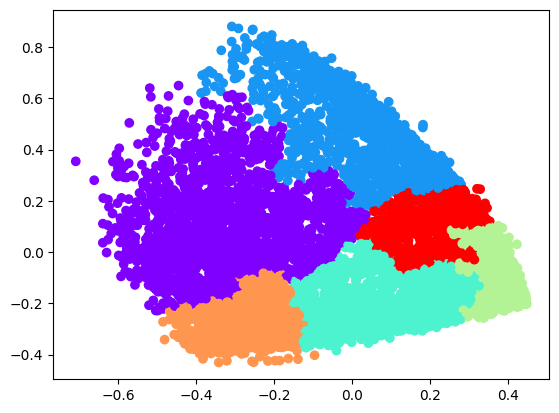

In [52]:
a5=AgglomerativeClustering(n_clusters=6)
plt.scatter(x_pca['p1'],x_pca['p2'],c=a5.fit_predict(x_pca),cmap="rainbow")

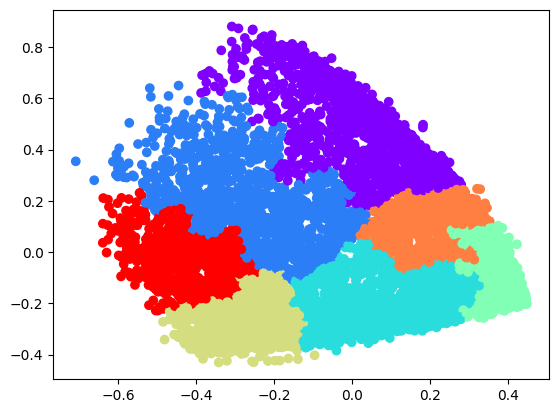

In [53]:
a6=AgglomerativeClustering(n_clusters=7)
plt.scatter(x_pca['p1'],x_pca['p2'],c=a6.fit_predict(x_pca),cmap="rainbow")

In [67]:
from sklearn.metrics import silhouette_score
silhouette_score(x_pca,a3.fit_predict(x_pca))

0.41775156489126475

In [65]:
sil_score=[]
sil_score.append(silhouette_score(x_pca,a1.fit_predict(x_pca)))
sil_score.append(silhouette_score(x_pca,a2.fit_predict(x_pca)))
sil_score.append(silhouette_score(x_pca,a3.fit_predict(x_pca)))
sil_score.append(silhouette_score(x_pca,a4.fit_predict(x_pca)))
sil_score.append(silhouette_score(x_pca,a5.fit_predict(x_pca)))
sil_score.append(silhouette_score(x_pca,a6.fit_predict(x_pca)))

<BarContainer object of 6 artists>

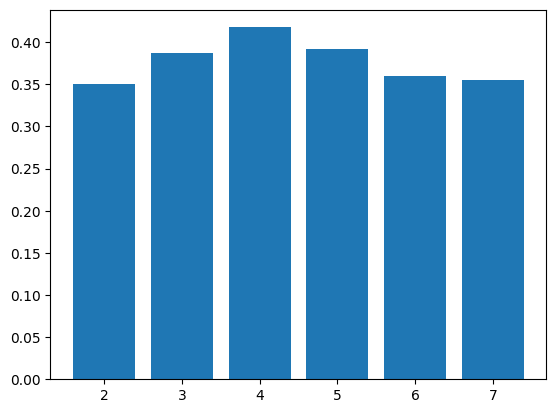

In [66]:
k=[2,3,4,5,6,7]
plt.bar(k,sil_score)

# The optimal no.of clusters is **4**